In [7]:
import pandas as pd

In [8]:
data = pd.read_csv('v2e-dvs-events.txt', sep = " ", engine='python', encoding = "cp949")

In [21]:
data.tail()

,time,x,y,event
161808,1.000623,197,93,0
161809,1.000623,345,116,1
161810,1.000623,161,147,0
161811,1.000623,151,145,0
161812,1.000623,144,93,1


In [29]:
data_p = data[data['event']==0]
data_n = data[data['event']==1]

In [23]:
import matplotlib.pyplot as plt 
from mpl_toolkits.mplot3d import Axes3D

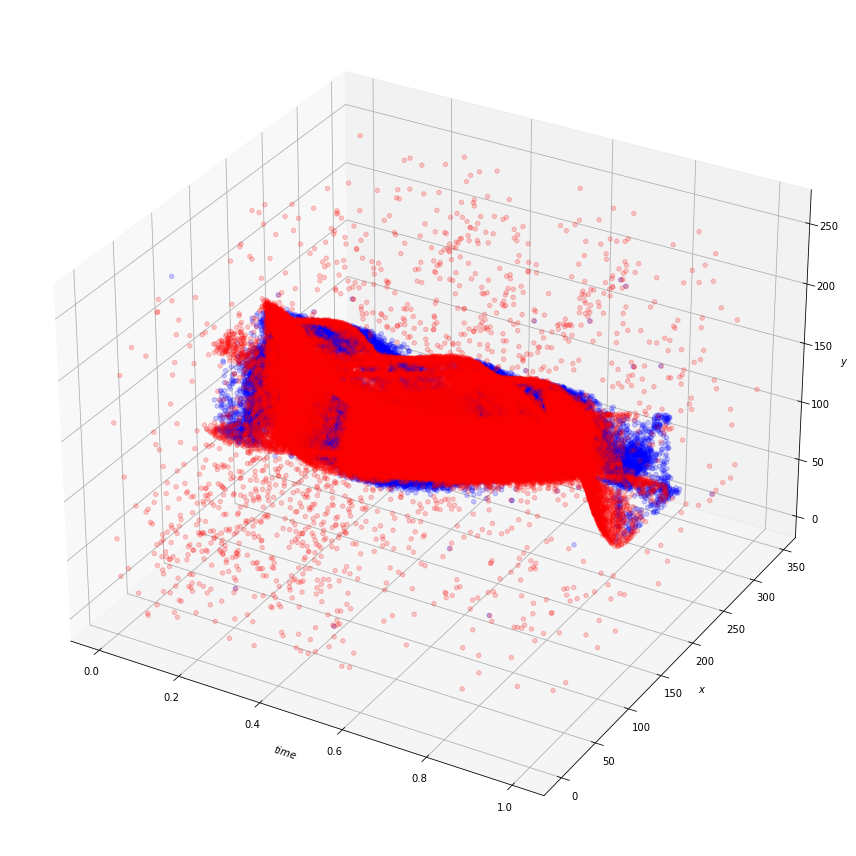

In [33]:
fig = plt.figure(figsize=(12, 12))

ax1 = plt.subplot(111, projection='3d')

ax1.set_xlabel('$time$')
ax1.set_ylabel('$x$')
ax1.set_zlabel('$y$')

ax1.scatter(data_p['time'], data_p['x'], data_p['y'], marker='o', color='blue', alpha=0.2)
ax1.scatter(data_n['time'], data_n['x'], data_n['y'], marker='o', color='red', alpha=0.2)

plt.tight_layout()
plt.show()

In [52]:
frame = pd.read_csv('dvs-video-frame_times.txt', sep = "\t", engine='python', encoding = "cp949")

In [79]:
frame.tail()

,frame,time
194,194,0.978543
195,195,0.983543
196,196,0.988543
197,197,0.993543
198,198,0.998543


In [91]:
data.loc[1].to_list()

[1.0006232261657717, 147.0, 93.0, 1.0]

In [96]:
import numpy as np

event_frames = []
data = pd.read_csv('v2e-dvs-events.txt', sep = " ", engine='python', encoding = "cp949")
event_sum = 0
total_events = len(data)
for i in range(len(frame)-1):
    print("%d / %d frame..." %(i+1, len(frame)-1), end=' ')
    start = frame.loc[i][1]
    end = frame.loc[i+1][1]
    one_frame = []
    for j in range(len(data)) :
        temp = data.loc[j][0]
        if temp >= start and temp < end :
            one_frame.append(data.loc[j].to_list())
        if temp > end :
            one_sum = len(data[:j])
            event_sum = event_sum + one_sum
            data = data[j:]
            data.reset_index(inplace=True, drop=True)
            event_frames.append(one_frame)
            print('Done(%d / %d)' %(event_sum, total_events))
            break

1 / 198 frame... Done(158 / 161813)
2 / 198 frame... Done(286 / 161813)
3 / 198 frame... Done(409 / 161813)
4 / 198 frame... Done(571 / 161813)
5 / 198 frame... Done(700 / 161813)
6 / 198 frame... Done(840 / 161813)
7 / 198 frame... Done(1096 / 161813)
8 / 198 frame... Done(1278 / 161813)
9 / 198 frame... Done(1572 / 161813)
10 / 198 frame... Done(1777 / 161813)
11 / 198 frame... Done(2174 / 161813)
12 / 198 frame... Done(2465 / 161813)
13 / 198 frame... Done(2798 / 161813)
14 / 198 frame... Done(3361 / 161813)
15 / 198 frame... Done(3781 / 161813)
16 / 198 frame... Done(4264 / 161813)
17 / 198 frame... Done(4993 / 161813)
18 / 198 frame... Done(5562 / 161813)
19 / 198 frame... Done(6408 / 161813)
20 / 198 frame... Done(6952 / 161813)
21 / 198 frame... Done(7763 / 161813)
22 / 198 frame... Done(8239 / 161813)
23 / 198 frame... Done(8744 / 161813)
24 / 198 frame... Done(9527 / 161813)
25 / 198 frame... Done(10028 / 161813)
26 / 198 frame... Done(10784 / 161813)
27 / 198 frame... Done(11

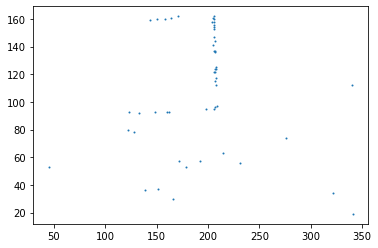

In [152]:
frame_img = np.array(event_frames[0])[:,1:3]
plt.scatter(frame_img[:,0],frame_img[:,1],s=1)

<ipython-input-151-a555ec03525d>:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(i)


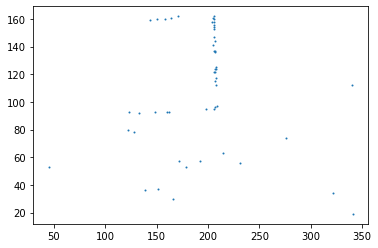

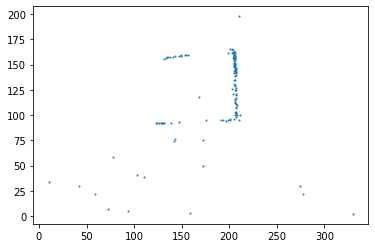

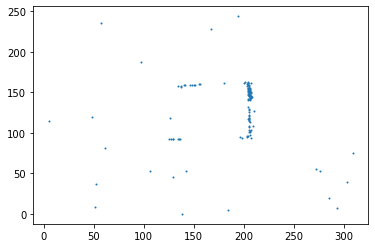

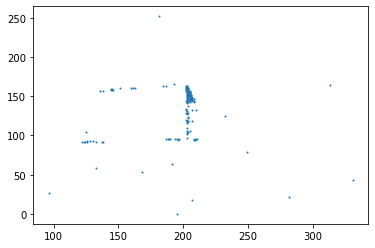

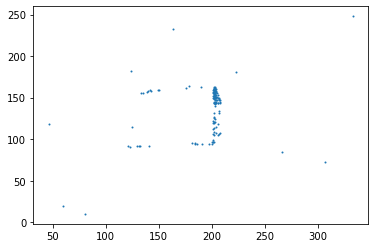

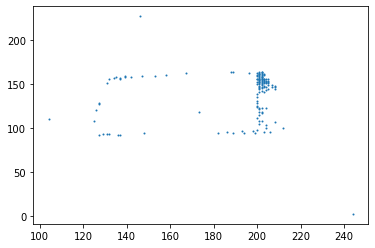

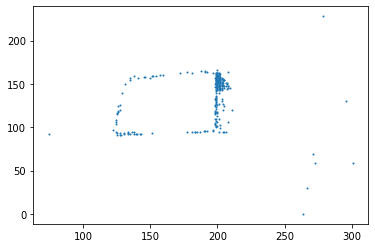

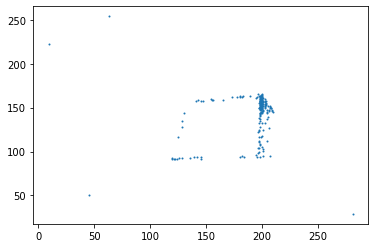

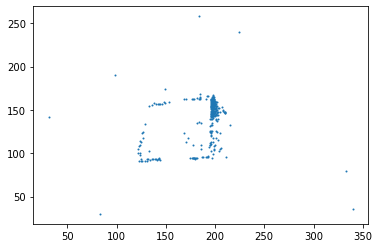

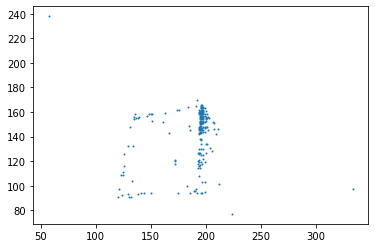

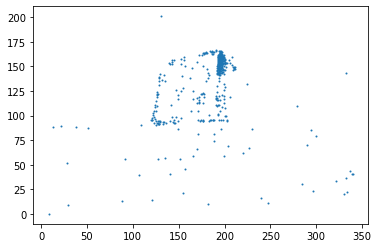

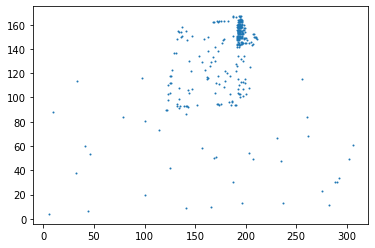

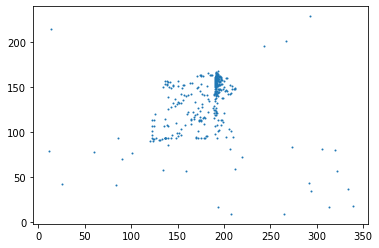

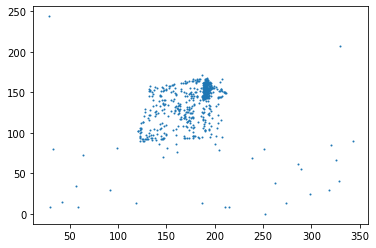

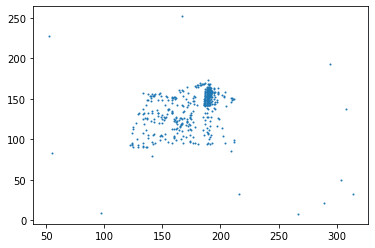

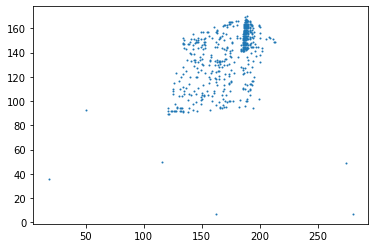

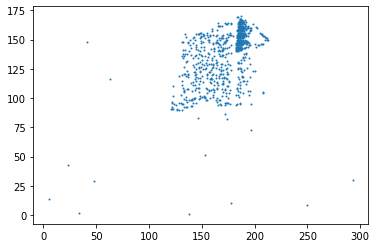

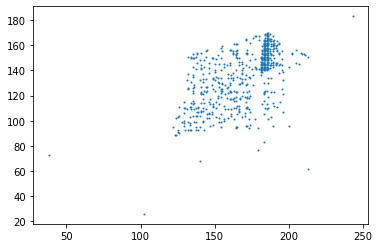

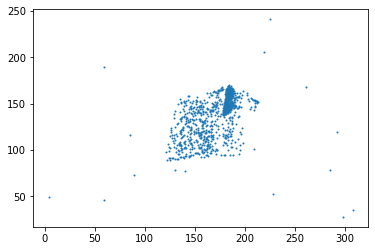

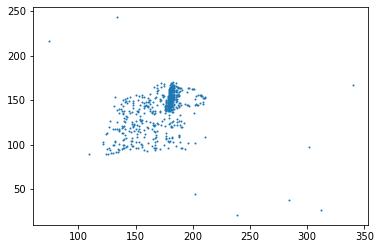

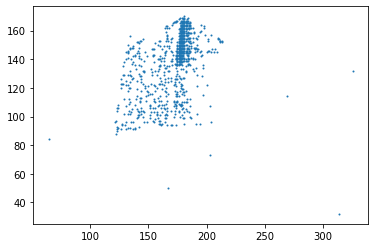

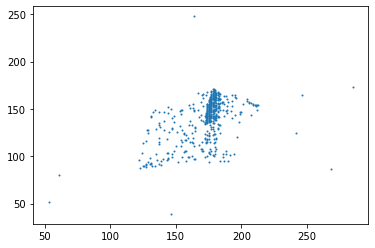

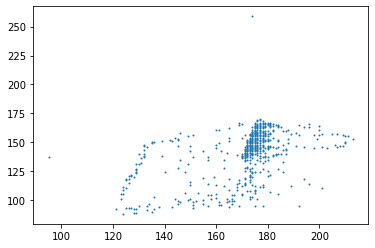

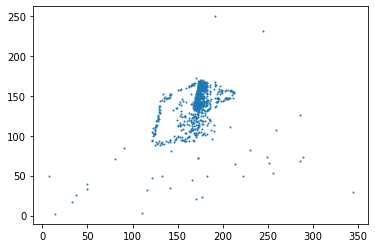

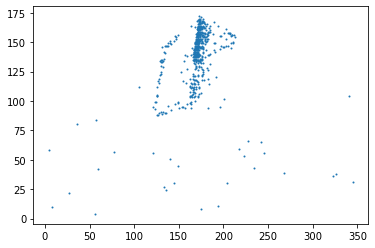

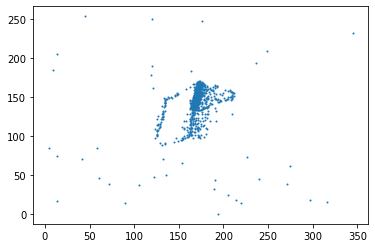

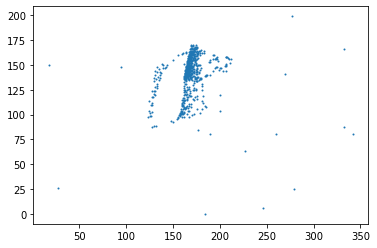

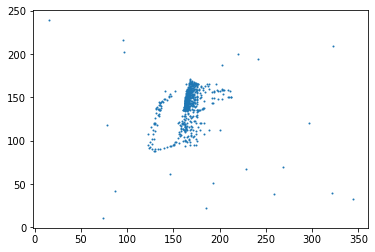

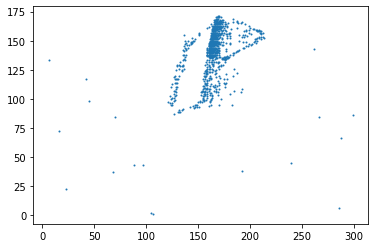

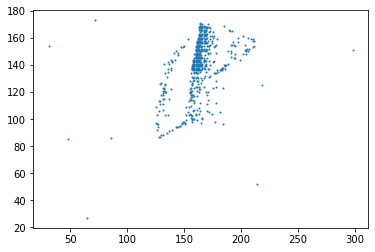

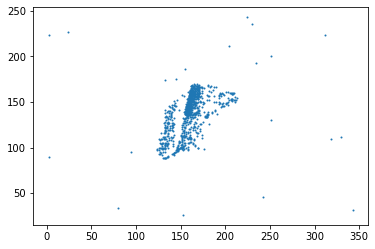

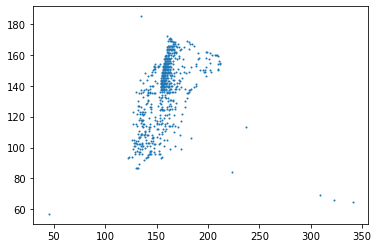

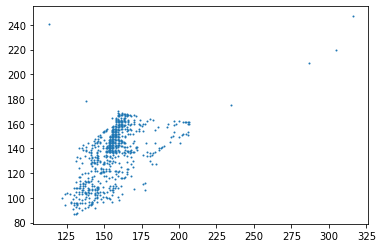

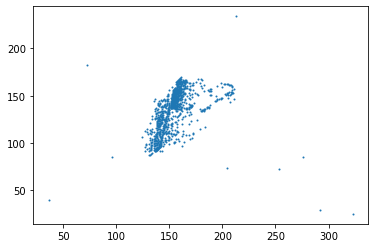

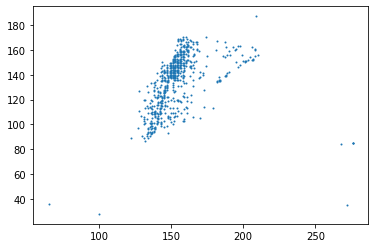

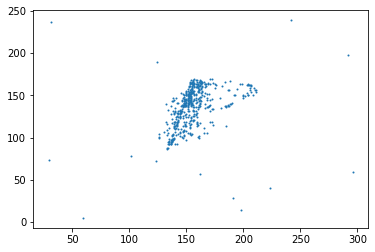

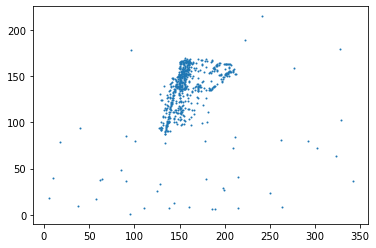

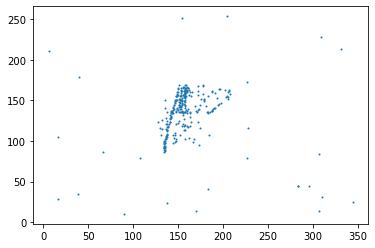

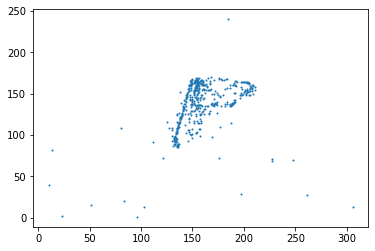

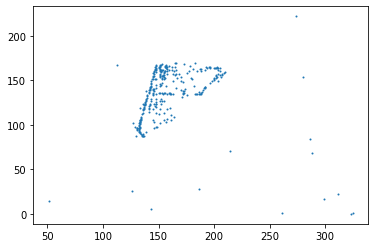

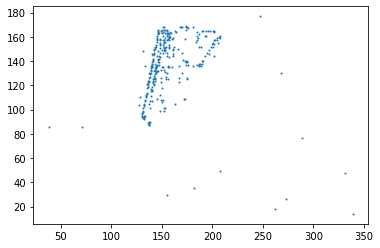

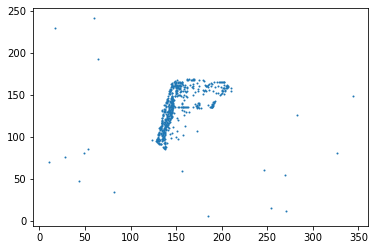

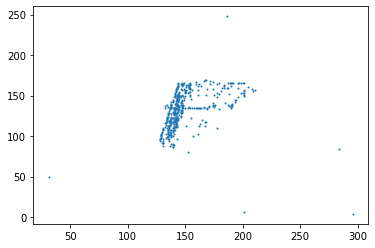

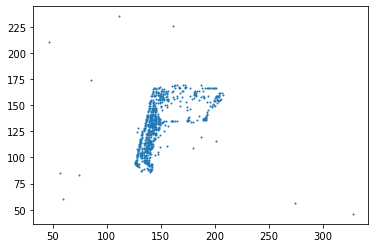

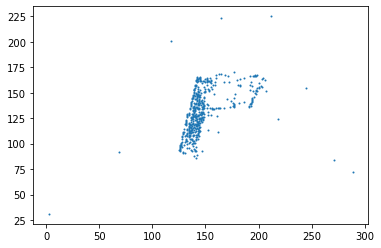

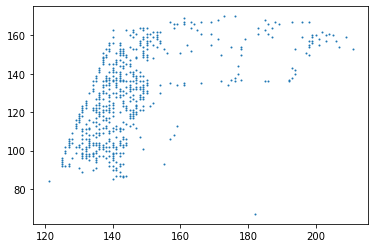

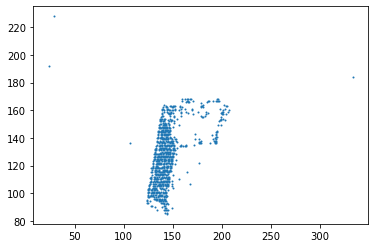

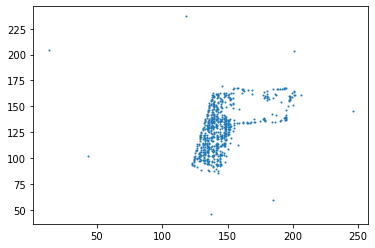

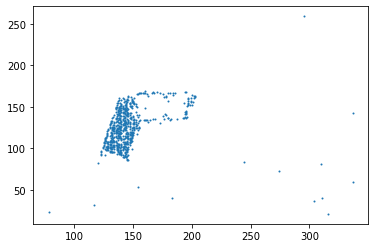

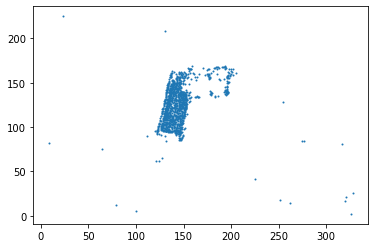

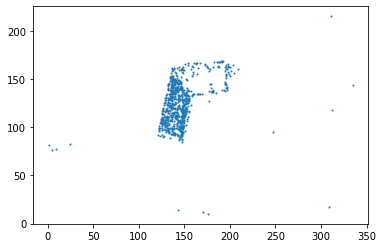

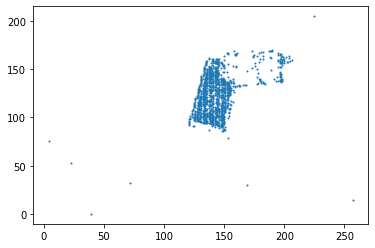

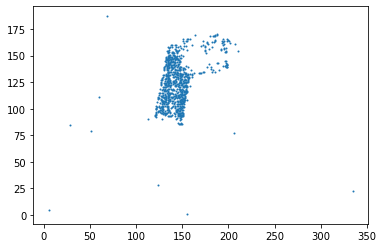

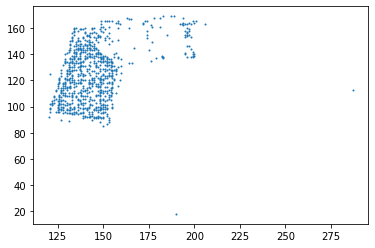

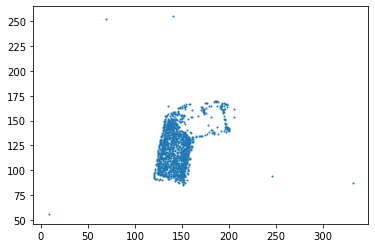

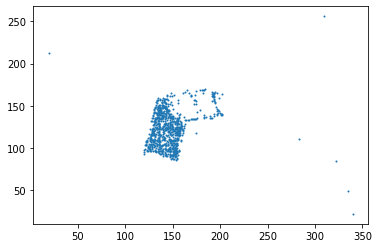

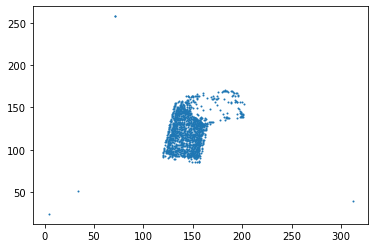

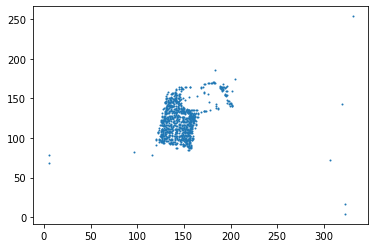

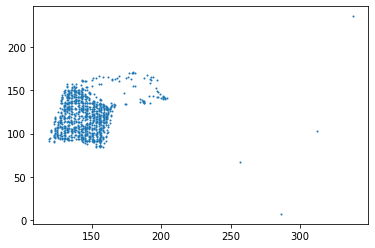

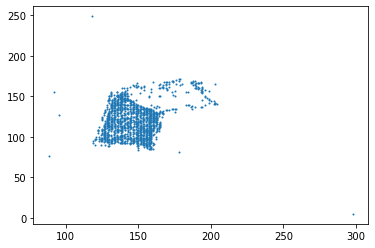

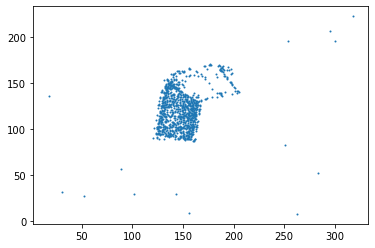

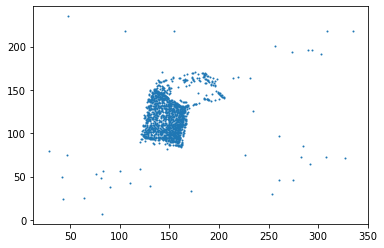

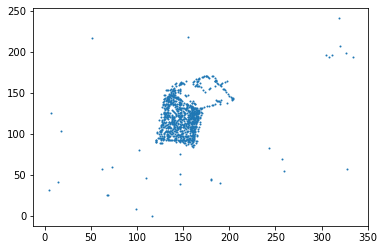

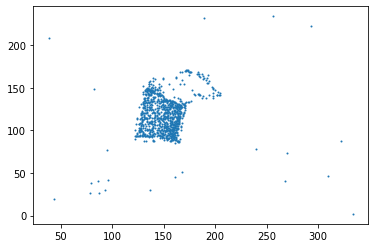

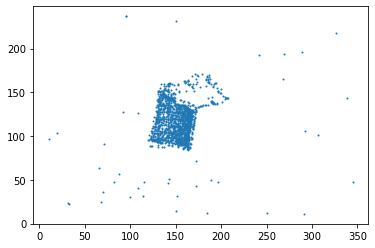

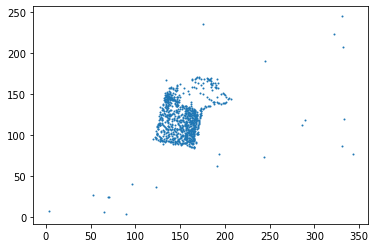

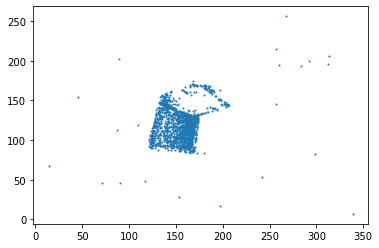

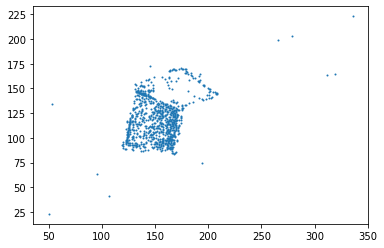

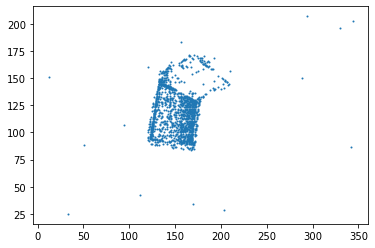

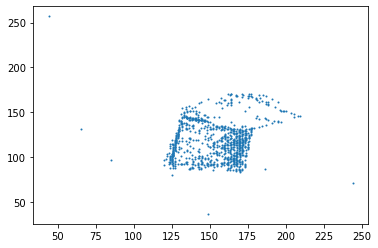

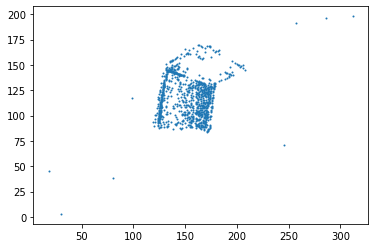

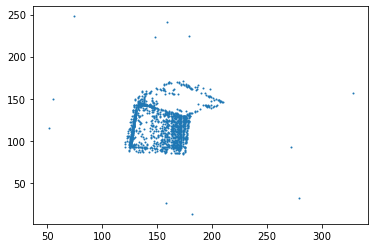

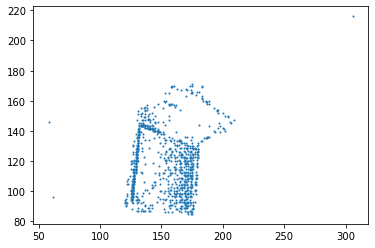

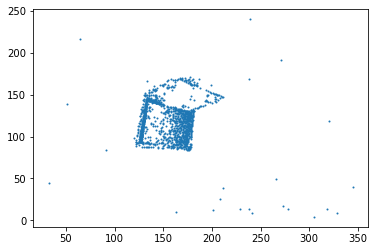

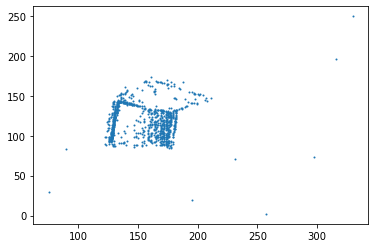

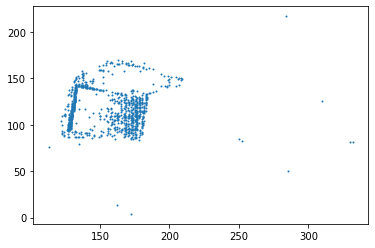

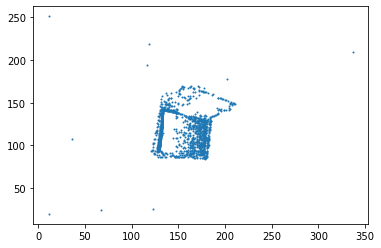

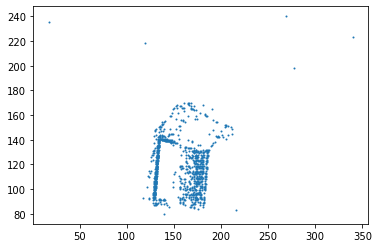

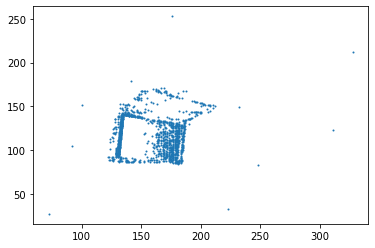

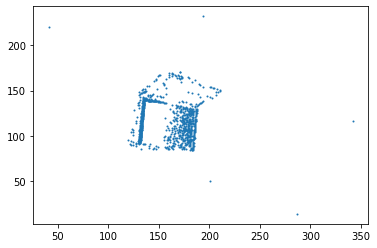

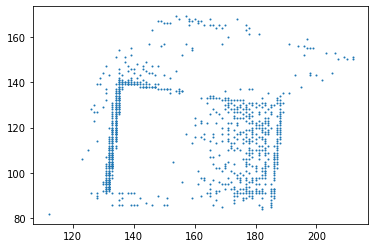

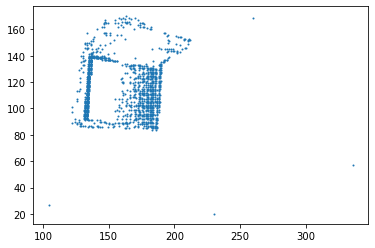

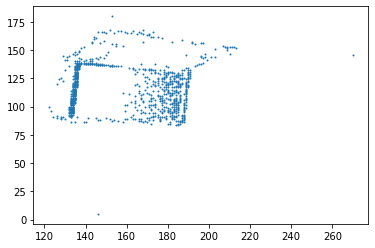

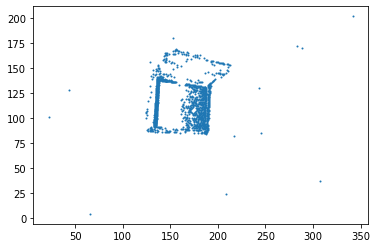

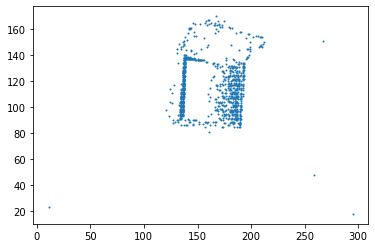

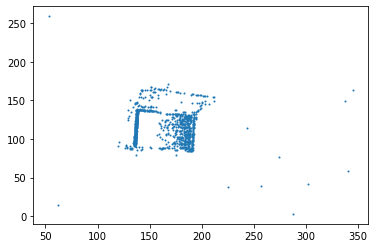

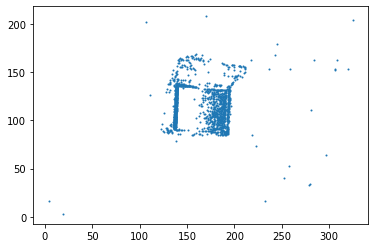

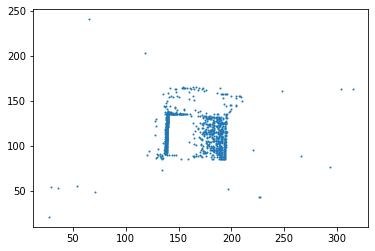

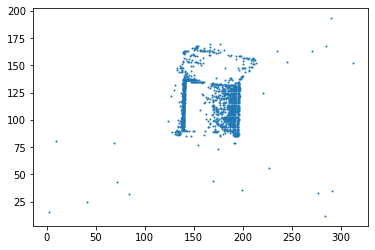

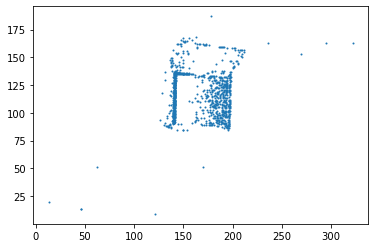

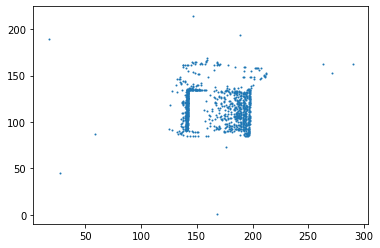

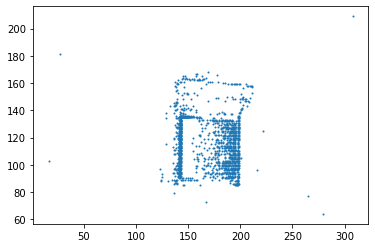

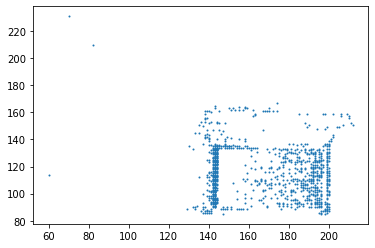

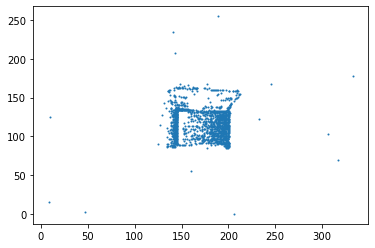

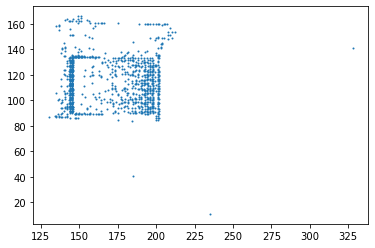

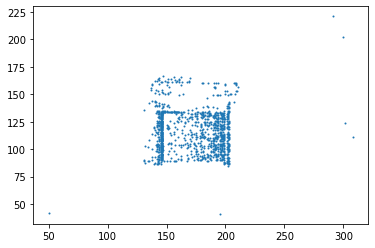

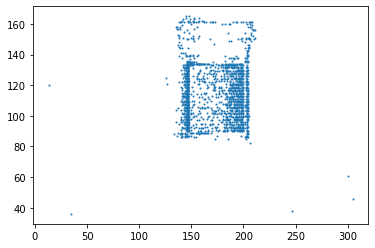

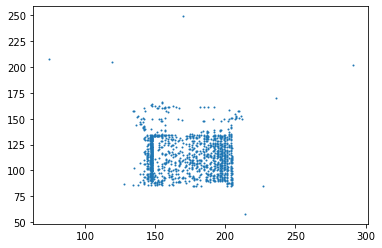

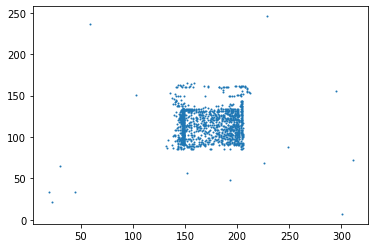

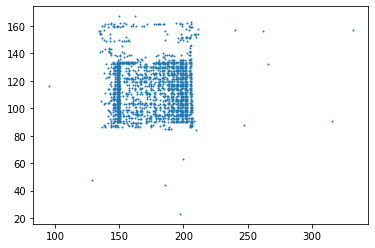

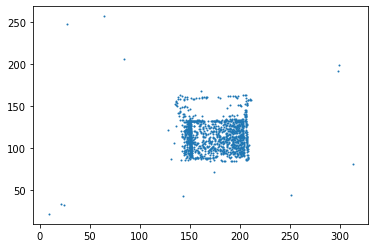

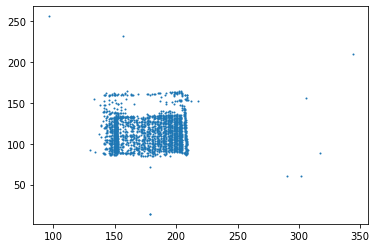

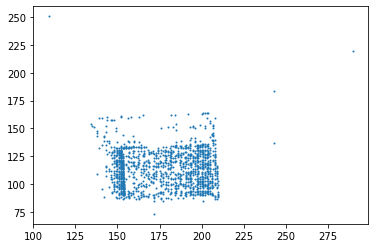

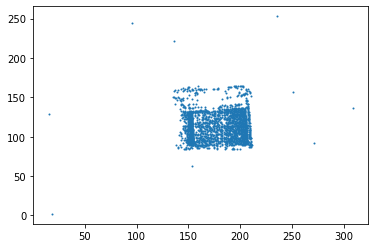

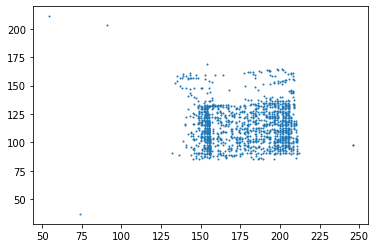

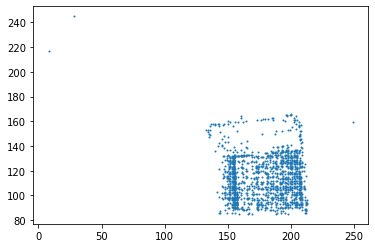

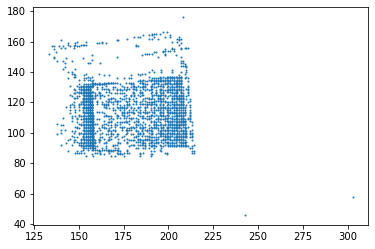

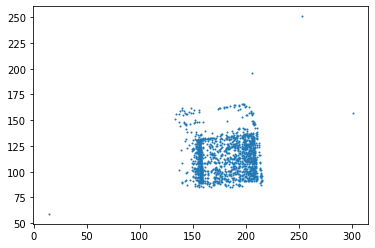

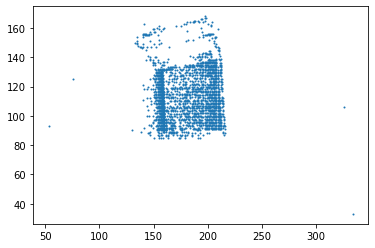

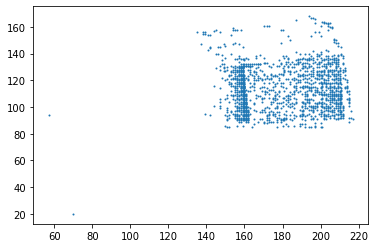

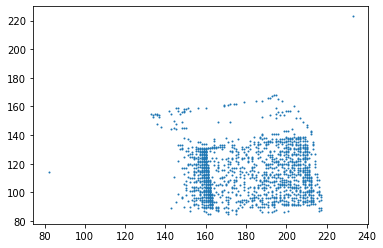

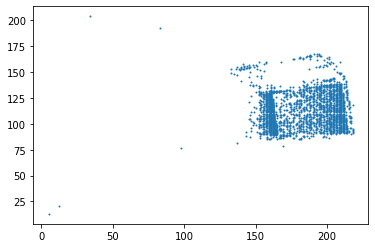

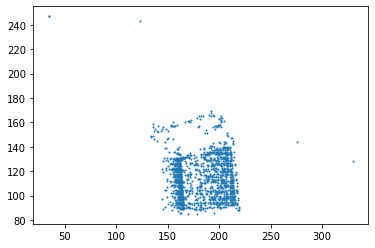

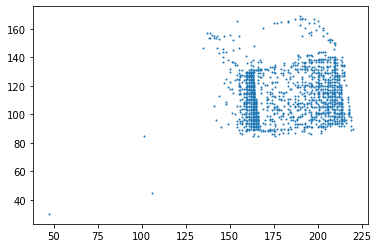

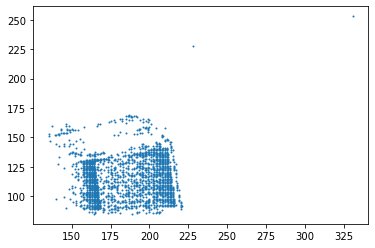

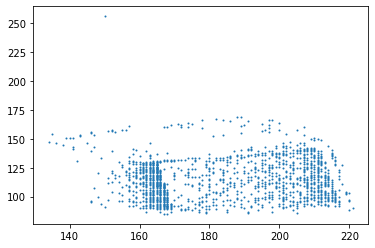

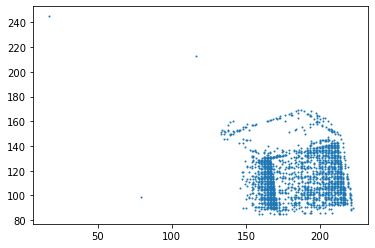

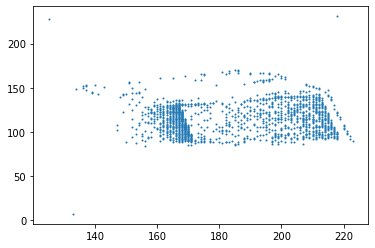

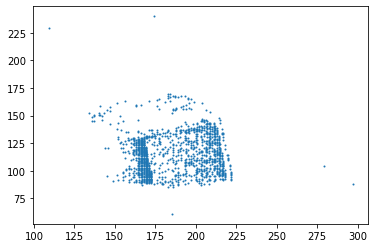

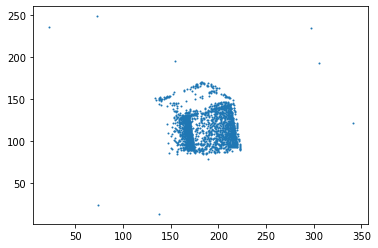

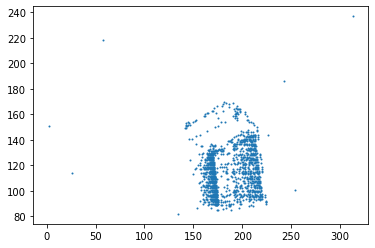

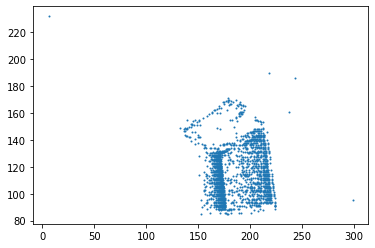

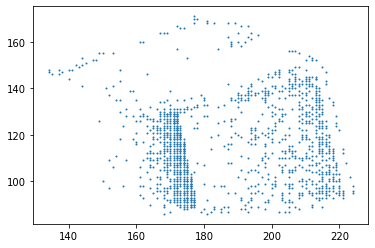

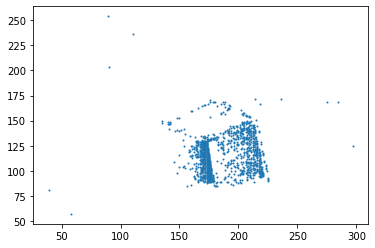

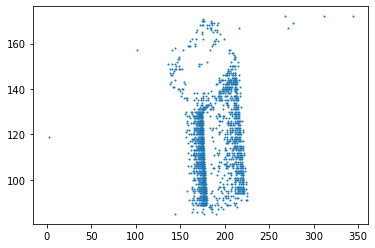

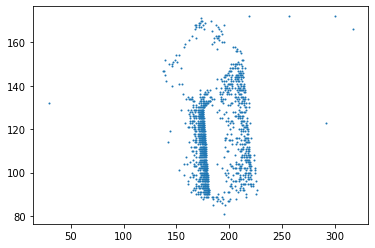

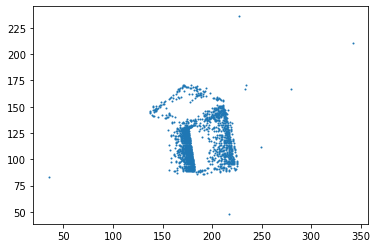

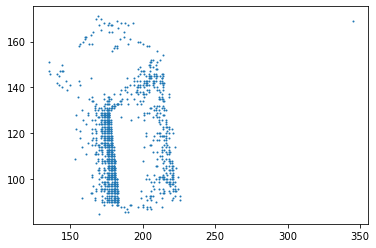

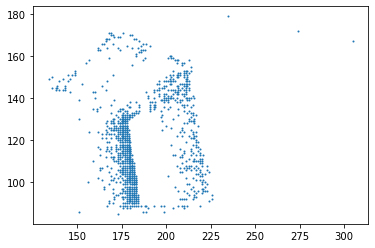

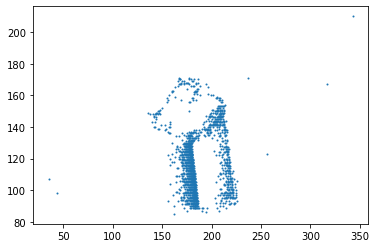

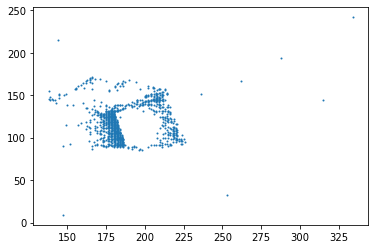

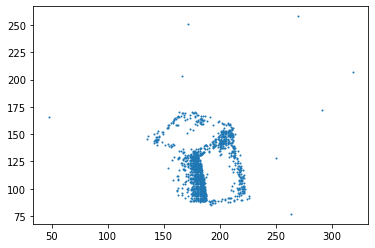

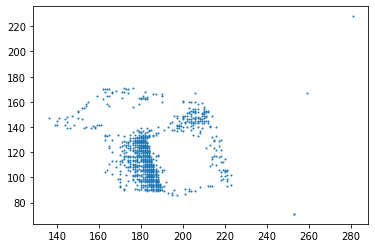

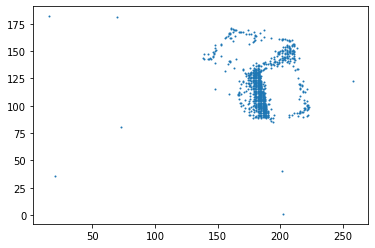

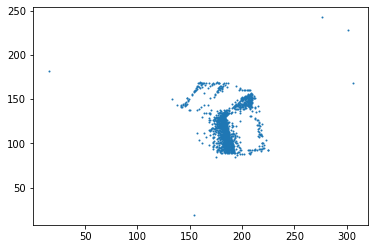

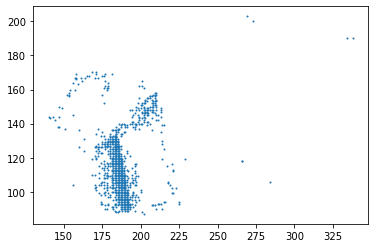

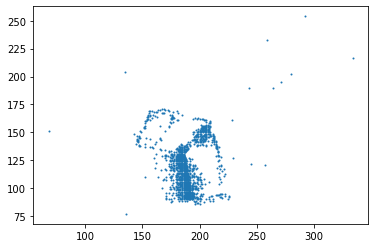

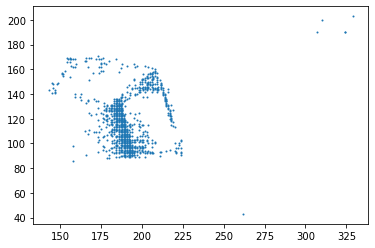

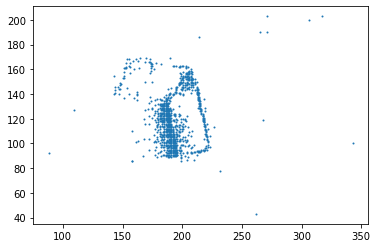

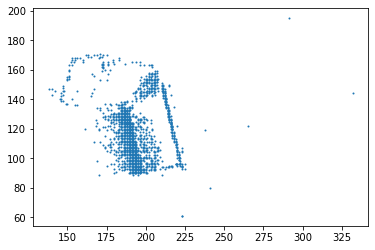

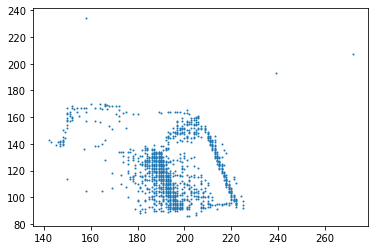

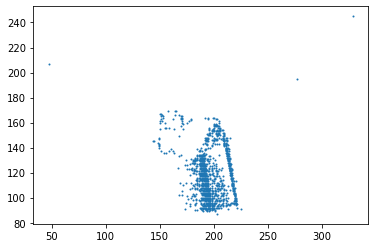

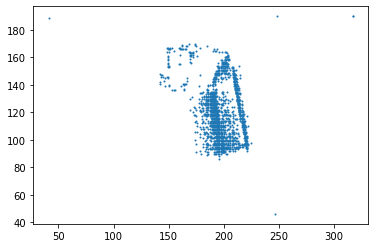

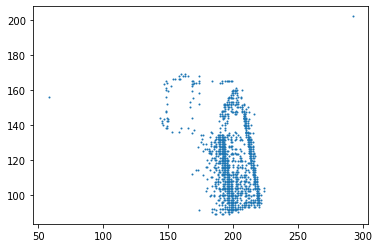

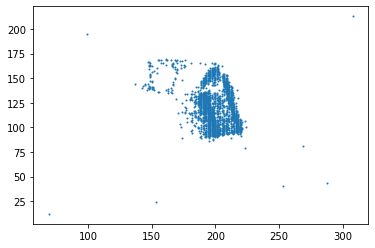

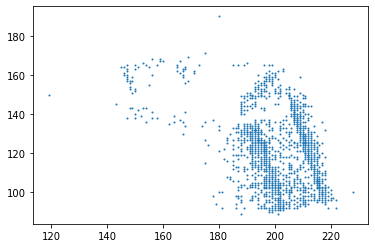

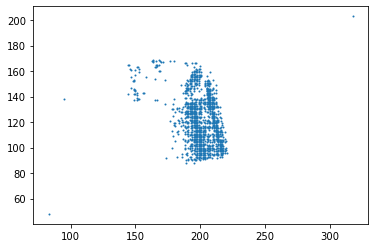

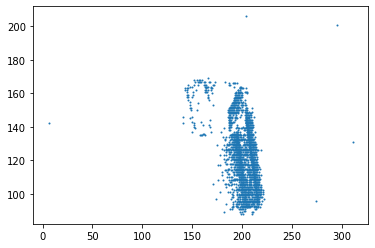

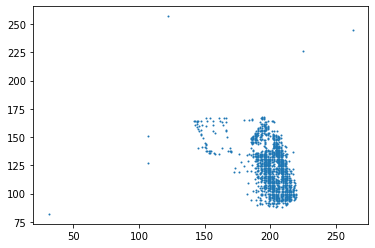

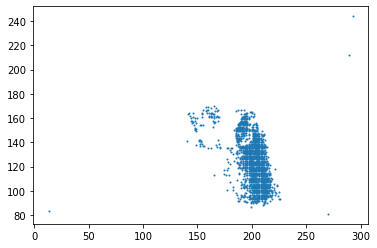

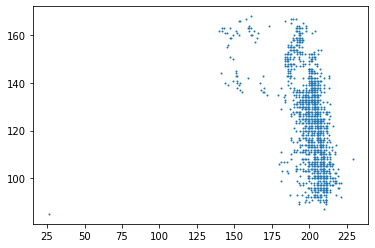

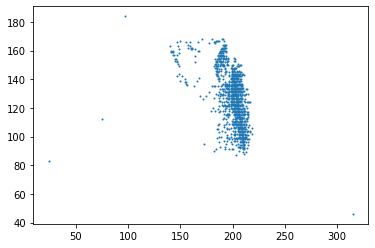

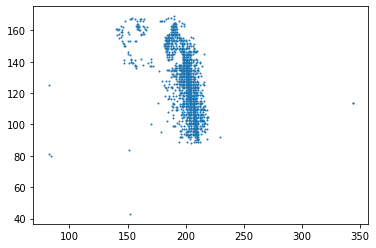

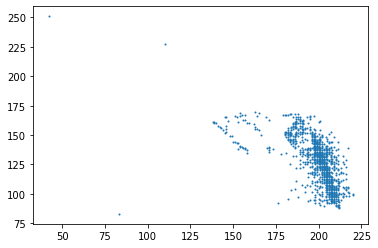

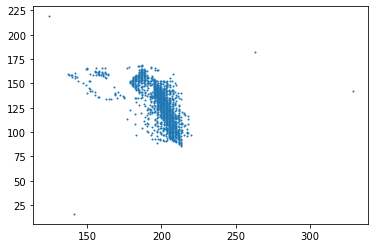

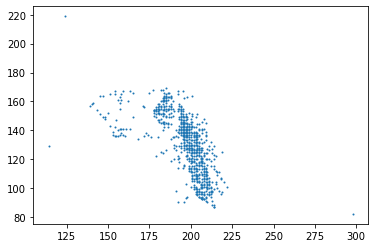

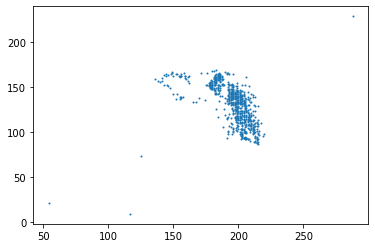

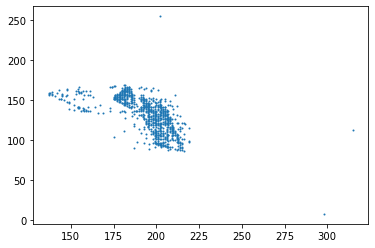

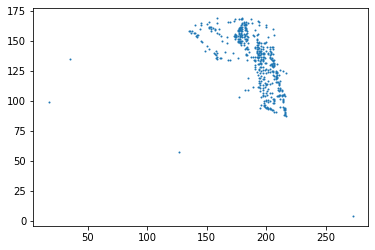

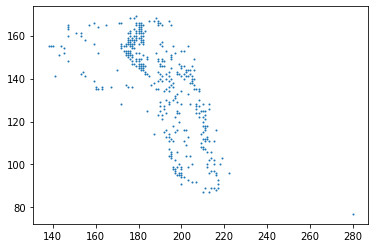

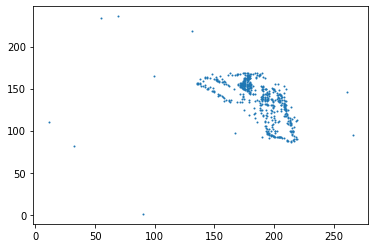

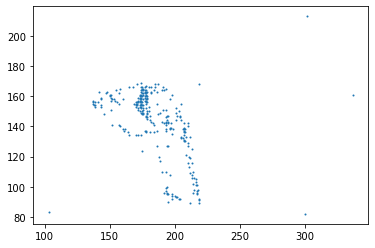

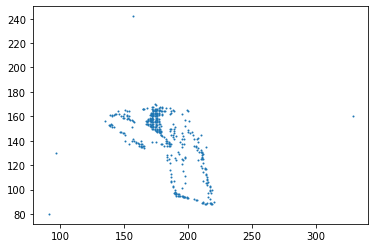

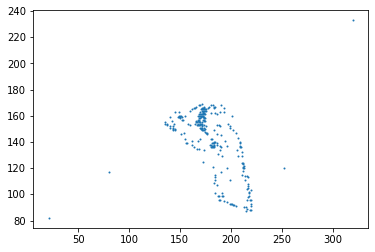

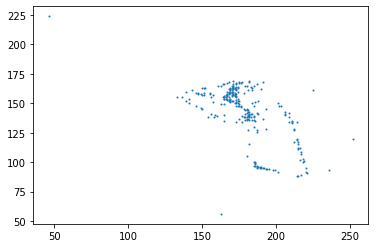

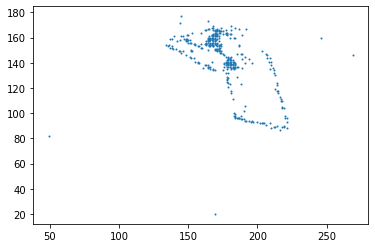

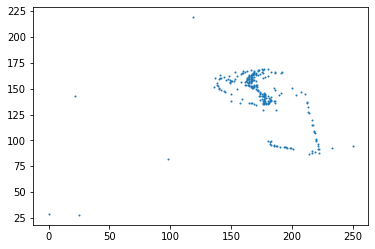

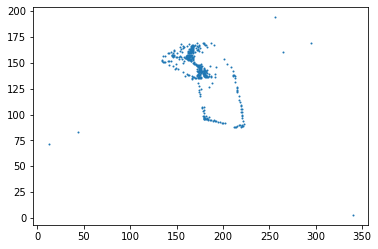

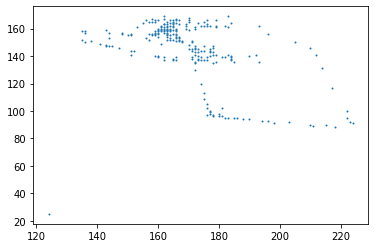

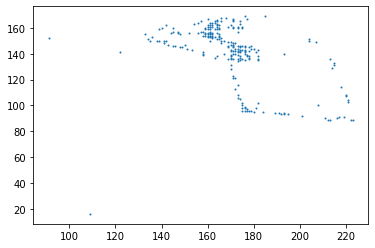

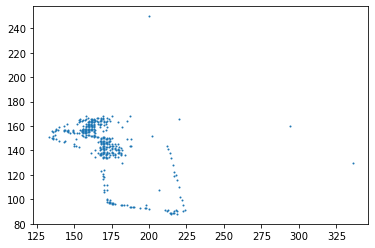

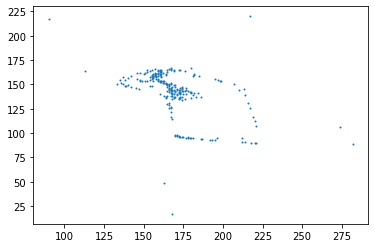

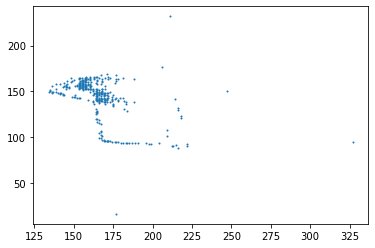

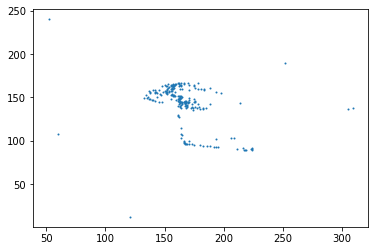

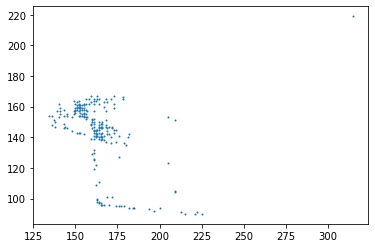

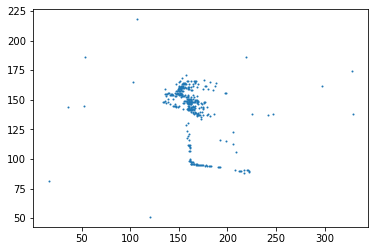

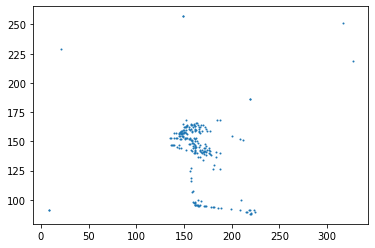

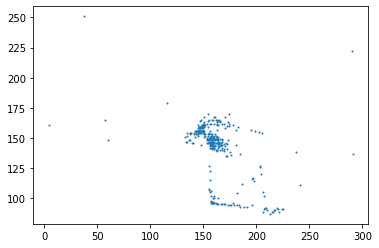

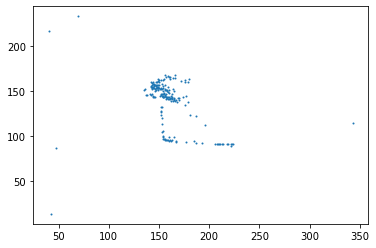

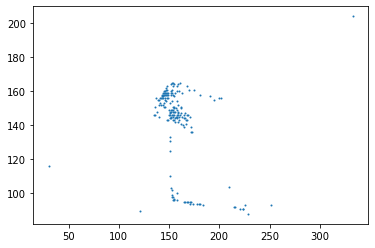

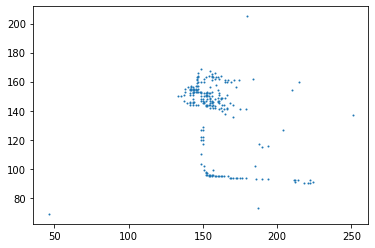

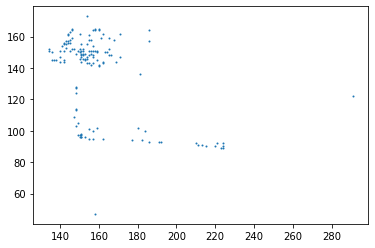

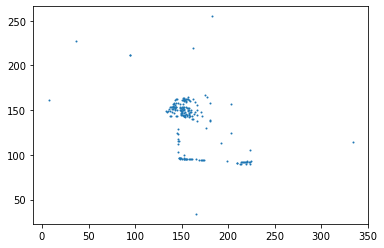

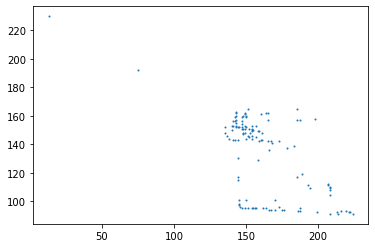

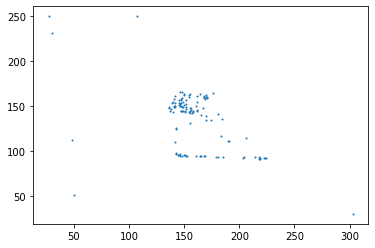

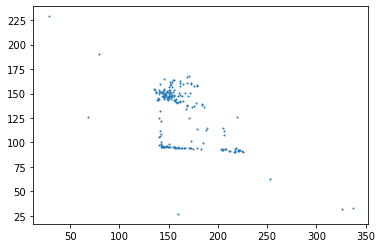

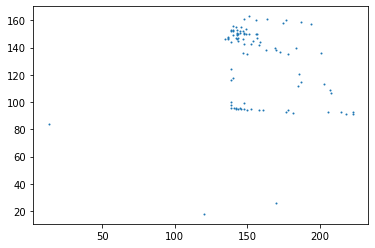

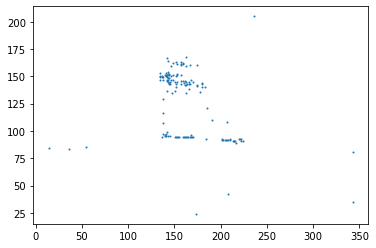

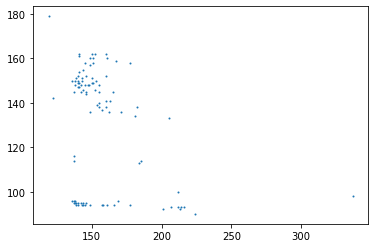

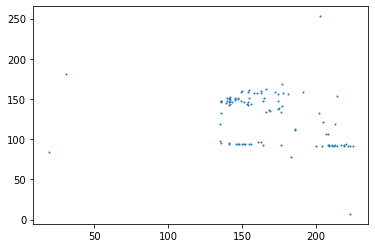

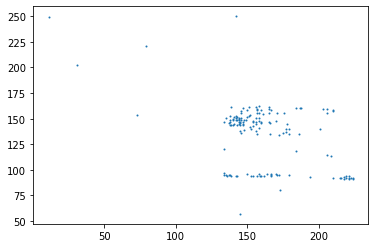

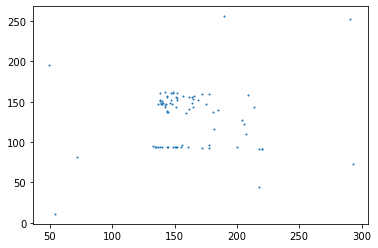

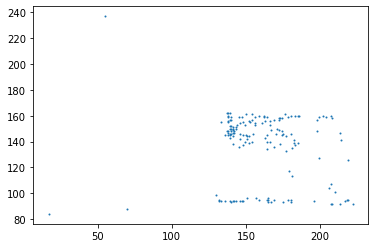

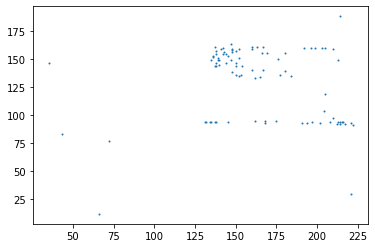

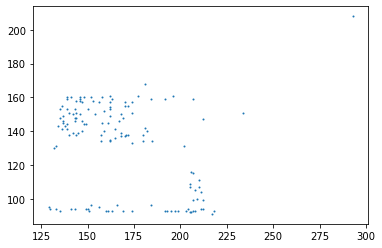

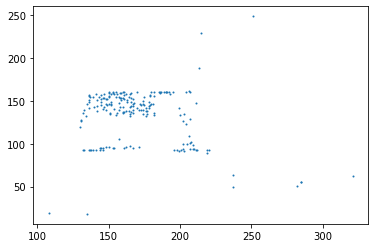

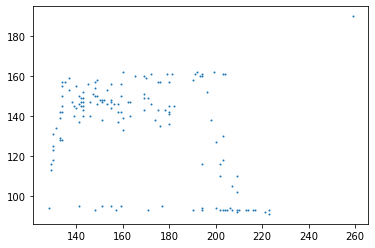

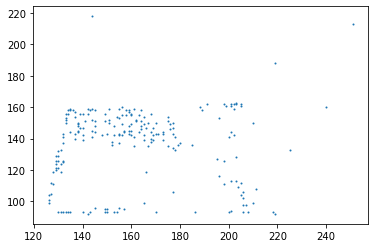

In [151]:
for i in range(198):
    frame_img = np.array(event_frames[i])[:,1:3]
    plt.figure(i)
    plt.scatter(frame_img[:,0],frame_img[:,1],s=1)